<a href="https://colab.research.google.com/github/KaustubhSN12/KNN_Algorithm_Exercise_ML/blob/main/KNN_Algorithm_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementting a K-Nearest Neighbor (KNN) algorithm

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning/databases/iris/iris.data"

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#assign column names to dataset

names = ['sepal-length','sepal-width','petal-length','petal-width','Class']



In [13]:
#read dataset to pandas dataframe

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=names)

In [14]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
dataset.isnull().sum()

,0
sepal-length,0
sepal-width,0
petal-length,0
petal-width,0
Class,0


In [18]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

The X variable contains the first four columns of the dataset ( ig attributes) while y contains the labels.

Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

###Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[ 0.56120845, -1.34716123,  0.65364145,  0.37424215],
       [ 0.81017339, -0.15673894,  0.99943266,  0.76818126],
       [ 0.31224352, -0.63290786,  0.13495463,  0.11161608],
       [ 0.68569092,  0.31942998,  0.88416892,  1.42474645],
       [-0.43465128, -1.34716123,  0.13495463,  0.11161608],
       [ 0.68569092,  0.31942998,  0.42311397,  0.37424215],
       [ 0.31224352, -0.15673894,  0.48074584,  0.24292912],
       [ 0.18776105, -0.87099231,  0.76890518,  0.50555519],
       [ 0.56120845,  0.55751444,  0.53837771,  0.50555519],
       [-0.55913374,  1.9860212 , -1.42110583, -1.07020125],
       [-1.67947594, -1.82333015, -1.42110583, -1.20151428],
       [-1.30602854, -0.15673894, -1.36347396, -1.20151428],
       [ 0.68569092, -0.87099231,  0.88416892,  0.8994943 ],
       [ 2.30396298, -0.15673894,  1.34522387,  1.42474645],
       [ 1.43258572,  0.31942998,  0.53837771,  0.24292912],
       [-0.93258114,  1.03368336, -1.36347396, -1.20151428],
       [-1.18154608,  0.

In [22]:
X_test

array([[-1.30602854,  0.7955989 , -1.07531462, -1.33282732],
       [-1.05706361,  0.55751444, -1.36347396, -1.33282732],
       [ 1.18362078,  0.31942998,  1.22996013,  1.42474645],
       [-0.31016881, -0.15673894,  0.19258649,  0.11161608],
       [-1.05706361,  1.03368336, -1.42110583, -1.20151428],
       [ 1.30810325,  0.08134552,  0.65364145,  0.37424215],
       [-0.80809868,  0.7955989 , -1.36347396, -1.33282732],
       [-1.05706361,  0.31942998, -1.4787377 , -1.33282732],
       [ 1.68155065,  1.27176782,  1.34522387,  1.68737252],
       [ 1.05913832, -0.15673894,  0.71127331,  0.63686823],
       [ 2.17948052, -0.15673894,  1.63338322,  1.16212037],
       [-0.18568635, -1.34716123,  0.71127331,  1.03080734],
       [-0.06120388, -0.87099231,  0.07732276, -0.01969696],
       [-0.06120388, -0.87099231,  0.19258649, -0.28232303],
       [-0.68361621,  1.50985228, -1.30584209, -1.33282732],
       [-1.55499348,  0.08134552, -1.30584209, -1.33282732],
       [ 0.56120845, -0.

###Training and Predictions'

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

###Evaluating the Algorithm

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print()
print("**************************************************************")
print()
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]

**************************************************************

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



##Comparing Error Rate with K values

In [27]:
error = []
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# calculatng error for K values between 1 and 40

In [29]:
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.



Text(0, 0.5, 'Mean Error')

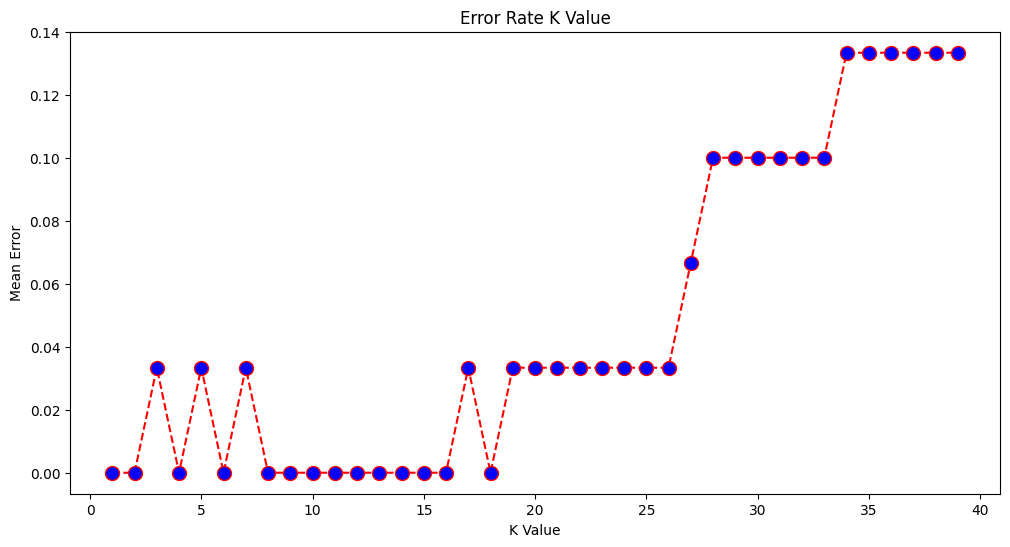

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#END